# Work
請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Activation, Flatten
from keras.regularizers import l1_l2

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


Using TensorFlow backend.


In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.cifar10.load_data()

print(f' train data shape : {train_x.shape}')
print(f' train label shape : {train_y.shape}')
print(f' test data shape : {test_x.shape}')
print(f' test label shape : {test_y.shape}')

 train data shape : (50000, 32, 32, 3)
 train label shape : (50000, 1)
 test data shape : (10000, 32, 32, 3)
 test label shape : (10000, 1)


In [3]:
def preproc_x(x, flatten = False):
  x = x/255.0
  if flatten :
    x = x.reshape((len(x), -1))
  return x

def preproc_y(y, num_classes = 10):
  if y.shape[-1] == 1 :
    y = keras.utils.to_categorical(y, num_classes)
  return y

In [4]:
train_x = preproc_x(train_x)
test_x = preproc_x(test_x)

train_y = preproc_y(train_y)
test_y = preproc_y(test_y)

In [5]:
#Using Dropout and BatchNormalization to do the regularization
def build_model(input_shape, output_units = 10):
  
  input_layer = keras.layers.Input(input_shape)
  
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same') (input_layer)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same') (x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size = (2,2))(x)
  x = Dropout(0.25)(x)
  
  x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same') (x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same') (x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size = (2,2))(x)
  x = Dropout(0.25)(x)
  
  x = Flatten()(x)
  
  x = Dense(units = 512)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)
  x = Dense(units = 256)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)
  x = Dense(units = 128)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)
  
  output_layer = Dense(units = output_units, activation = 'softmax')(x)
  
  model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
  
  return model

In [6]:
batch_size = 128
epochs = 50

In [7]:
results = {}

model = build_model(train_x.shape[1:], 10)
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, shuffle = True, validation_data = [test_x, test_y])

name_tag = "Dropout_NB"
results[name_tag] = {
    'train_loss' : history.history['loss'],
    'valid_loss' : history.history['val_loss'],
    'train_acc' : history.history['acc'],
    'valid_acc' : history.history['val_acc']
}


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2

50000/50000 [==============================] - 386s 8ms/step - loss: 0.2797 - acc: 0.9025 - val_loss: 0.6572 - val_acc: 0.8016
Epoch 22/50
50000/50000 [==============================] - 386s 8ms/step - loss: 0.2623 - acc: 0.9076 - val_loss: 0.5751 - val_acc: 0.8225
Epoch 23/50
50000/50000 [==============================] - 385s 8ms/step - loss: 0.2539 - acc: 0.9105 - val_loss: 0.6446 - val_acc: 0.8118
Epoch 24/50
50000/50000 [==============================] - 383s 8ms/step - loss: 0.2411 - acc: 0.9169 - val_loss: 0.7628 - val_acc: 0.7765
Epoch 25/50
50000/50000 [==============================] - 385s 8ms/step - loss: 0.2317 - acc: 0.9186 - val_loss: 0.6053 - val_acc: 0.8158
Epoch 26/50
50000/50000 [==============================] - 388s 8ms/step - loss: 0.2195 - acc: 0.9227 - val_loss: 0.6241 - val_acc: 0.8186
Epoch 27/50
50000/50000 [==============================] - 388s 8ms/step - loss: 0.2103 - acc: 0.9281 - val_loss: 0.6414 - val_acc: 0.8162
Epoch 28/50
50000/50000 [==============

In [8]:
#Using l1_l2 regularizer and BatchNormalization
def build_model2(input_shape, output_units):
  
  input_layer = keras.layers.Input(input_shape)
  regularizer = l1_l2(l1 = 1e-4 , l2 = 1e-6)
  
  
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', kernel_regularizer = regularizer) (input_layer)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', kernel_regularizer = regularizer) (x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size = (2,2))(x)
  
  x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', kernel_regularizer = regularizer) (x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', kernel_regularizer = regularizer) (x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size = (2,2))(x)
  
  x = Flatten()(x)
  
  x = Dense(units = 512, kernel_regularizer = regularizer)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dense(units = 256, kernel_regularizer = regularizer)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dense(units = 128, kernel_regularizer = regularizer)(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  
  output_layer = Dense(units = output_units, activation = 'softmax')(x)
  
  model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
  return model

In [9]:
model = build_model2(train_x.shape[1:], 10)
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, shuffle = True, validation_data = [test_x, test_y])

name_tag = "Regularizer_NB"
results[name_tag] = {
    'train_loss' : history.history['loss'],
    'valid_loss' : history.history['val_loss'],
    'train_acc' : history.history['acc'],
    'valid_acc' : history.history['val_acc']
}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 64)        0         
__________

50000/50000 [==============================] - 321s 6ms/step - loss: 0.7950 - acc: 0.9370 - val_loss: 1.6452 - val_acc: 0.7495
Epoch 33/50
50000/50000 [==============================] - 321s 6ms/step - loss: 0.8003 - acc: 0.9350 - val_loss: 1.5212 - val_acc: 0.7572
Epoch 34/50
50000/50000 [==============================] - 319s 6ms/step - loss: 0.7830 - acc: 0.9405 - val_loss: 1.6574 - val_acc: 0.7357
Epoch 35/50
50000/50000 [==============================] - 318s 6ms/step - loss: 0.7906 - acc: 0.9386 - val_loss: 1.7383 - val_acc: 0.7306
Epoch 36/50
50000/50000 [==============================] - 318s 6ms/step - loss: 0.7843 - acc: 0.9395 - val_loss: 1.6410 - val_acc: 0.7520
Epoch 37/50
50000/50000 [==============================] - 318s 6ms/step - loss: 0.7757 - acc: 0.9420 - val_loss: 1.6724 - val_acc: 0.7430
Epoch 38/50
50000/50000 [==============================] - 318s 6ms/step - loss: 0.7670 - acc: 0.9437 - val_loss: 2.0925 - val_acc: 0.6675
Epoch 39/50
50000/50000 [==============

In [10]:
#Using l1_l2 regularizer and Dropout
def build_model3(input_shape, output_units):
  
  input_layer = keras.layers.Input(input_shape)
  regularizer = l1_l2(l1 = 1e-4 , l2 = 1e-6)
  
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(input_layer)
  x = Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(x)
  x = MaxPooling2D(pool_size = (2,2))(x)
  x = Dropout(0.25)(x)
  x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(x)
  x = Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', activation = 'relu', kernel_regularizer = regularizer)(x)
  x = MaxPooling2D(pool_size = (2,2))(x)
  x = Dropout(0.25)(x)
  
  x = Flatten()(x)
  x = Dense(units = 512, activation = 'relu', kernel_regularizer = regularizer)(x)
  x = Dropout(0.25)(x)
  x = Dense(units = 256, activation = 'relu', kernel_regularizer = regularizer)(x)
  x = Dropout(0.25)(x)  
  x = Dense(units = 128, activation = 'relu', kernel_regularizer = regularizer)(x)
  x = Dropout(0.25)(x)  
  
  output_layer = Dense(units = output_units, activation = 'softmax')(x)
  
  model = keras.models.Model(inputs = [input_layer], outputs = [output_layer])
  return model

In [11]:
model = build_model3(train_x.shape[1:], 10)
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model.summary()

history = model.fit(train_x, train_y, batch_size = batch_size, epochs = epochs, shuffle = True, validation_data = [test_x, test_y])

name_tag = "Regularizer_Dropout"
results[name_tag] = {
    'train_loss' : history.history['loss'],
    'valid_loss' : history.history['val_loss'],
    'train_acc' : history.history['acc'],
    'valid_acc' : history.history['val_acc']
}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        18464     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 32)        9248      
__________

50000/50000 [==============================] - 258s 5ms/step - loss: 1.1610 - acc: 0.7300 - val_loss: 1.1283 - val_acc: 0.7406
Epoch 42/50
50000/50000 [==============================] - 254s 5ms/step - loss: 1.1549 - acc: 0.7322 - val_loss: 1.0789 - val_acc: 0.7580
Epoch 43/50
50000/50000 [==============================] - 260s 5ms/step - loss: 1.1516 - acc: 0.7358 - val_loss: 1.0772 - val_acc: 0.7591
Epoch 44/50
50000/50000 [==============================] - 260s 5ms/step - loss: 1.1506 - acc: 0.7342 - val_loss: 1.0873 - val_acc: 0.7553
Epoch 45/50
50000/50000 [==============================] - 262s 5ms/step - loss: 1.1562 - acc: 0.7320 - val_loss: 1.0662 - val_acc: 0.7687
Epoch 46/50
50000/50000 [==============================] - 263s 5ms/step - loss: 1.1524 - acc: 0.7335 - val_loss: 1.0711 - val_acc: 0.7628
Epoch 47/50
50000/50000 [==============================] - 261s 5ms/step - loss: 1.1499 - acc: 0.7349 - val_loss: 1.0580 - val_acc: 0.7712
Epoch 48/50
50000/50000 [==============

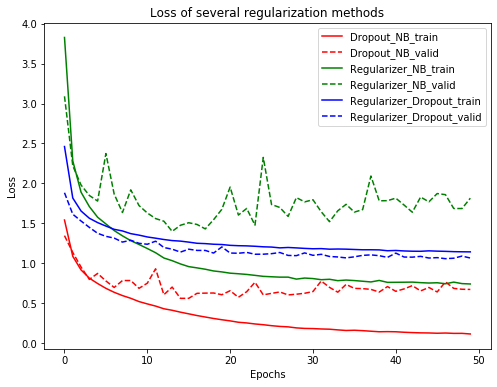

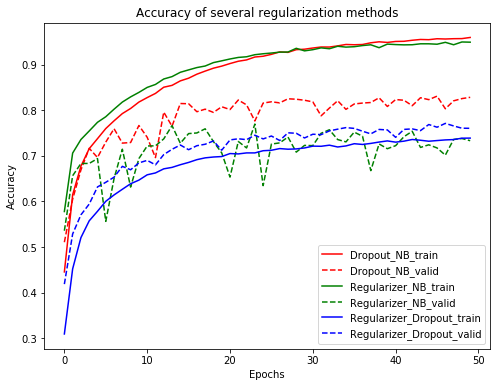

In [13]:
import matplotlib.pyplot as plt

colors = ['r','g','b','y','k','m']

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
  plt.plot(results[cond]['train_loss'], '-',label = cond + "_train", color = colors[i])
  plt.plot(results[cond]['valid_loss'], '--', label = cond + "_valid", color = colors[i])
  
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of several regularization methods')
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
  plt.plot(results[cond]['train_acc'],'-', label = cond + "_train", color = colors[i])
  plt.plot(results[cond]['valid_acc'],'--', label = cond + "_valid", color = colors[i])
  
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of several regularization methods')
plt.legend()
plt.show()